In [1]:
import numpy as np
import xarray as xr
import seaborn, functools
import scipy
import matplotlib.pyplot as plt

In [2]:
ds = xr.load_dataset("/home/deepak/Project/trial_short_project/jax-plasma/examples/solvers/particle_flux/my_dataset.nc")

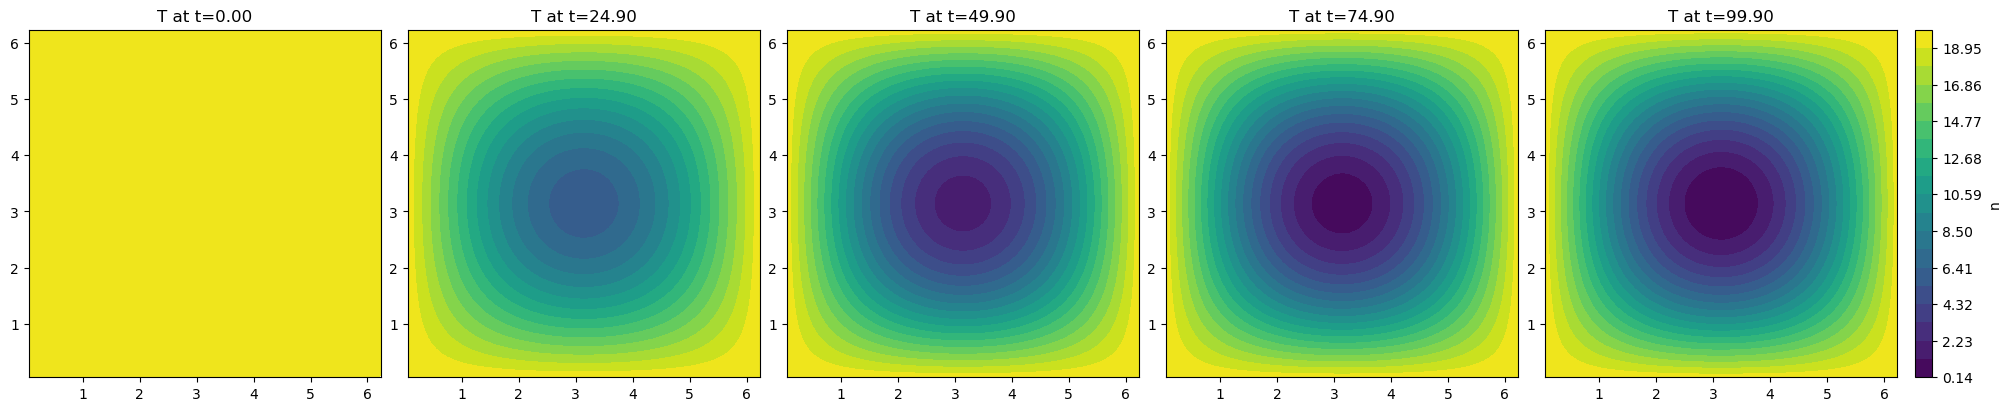

In [3]:
import matplotlib.pyplot as plt
import numpy as np

state_var='n'
# Choose n evenly spaced time indices
n = 5  # or any number you want
time_indices = np.linspace(0, 
                           len(ds['time']) - 1, 
                           n, dtype=int)

plt.close()
# Create subplots
fig, ax = plt.subplots(1, n, figsize=(4*n, 4*1), constrained_layout=True)

vmin = ds[state_var][1:].min().item()
vmax = ds[state_var][1:].max().item()+1e-6
for i, t_idx in enumerate(time_indices):
    im1 = ax[i].contourf(*np.meshgrid(ds['x'], ds['y'], indexing='ij'), ds[state_var][t_idx], 
                   levels=np.linspace(vmin, vmax, 20), 
                   cmap='viridis')
    ax[i].set_title(f"T at t={ds['time'].values[t_idx]:.2f}")

# Add shared colorbar
fig.colorbar(im1, ax=ax[i], orientation='vertical', label=state_var)

plt.show()


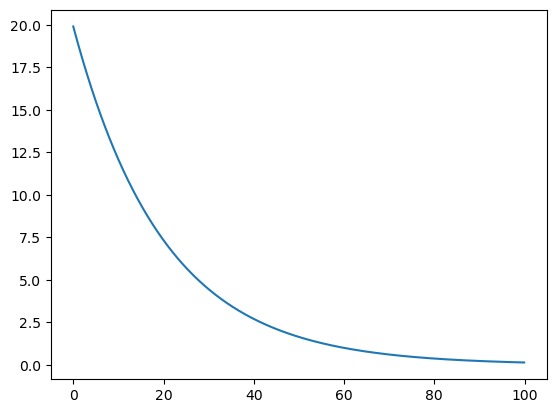

In [4]:
plt.plot(ds['time'], ds[state_var][:, 32,32], label=state_var)